In [1]:
from services.load_dataset import load_data
from services.modeling import run_tuner
import numpy as np

X_train, X_val, X_test, y_train, y_val, y_test  = load_data(data_folder='data')

In [2]:
best_model, best_hp, X_train_final_res, y_train_final_res, X_test_final, y_test_final = run_tuner(
    X_train=np.concatenate((X_train, X_val), axis=0),
    X_test=X_test,
    y_train=np.concatenate((y_train, y_val), axis=0),
    y_test=y_test
)

Trial 10 Complete [00h 20m 03s]
val_precision: 0.8483754396438599

Best val_precision So Far: 0.8483754396438599
Total elapsed time: 02h 46m 39s


c:\Users\Albert Salles\anaconda3\envs\ds\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(



Best Model Evaluation on Test Set:
Loss: 0.0182
Accuracy: 0.9876
Precision: 0.9095
Recall: 0.5466
AUC: 0.8826

All Trial Results:
Trial ID: 00, Score: 0.668789803981781, Hyperparameters: {'sequence_length': 5, 'units_lstm1': 96, 'dropout1': 0.5, 'units_lstm2': 64, 'dropout2': 0.1, 'learning_rate': 4.520432813845737e-06}
Trial ID: 01, Score: 0.7392857074737549, Hyperparameters: {'sequence_length': 10, 'units_lstm1': 32, 'dropout1': 0.4, 'units_lstm2': 32, 'dropout2': 0.5, 'learning_rate': 3.876188060366778e-05}
Trial ID: 02, Score: 0.7393364906311035, Hyperparameters: {'sequence_length': 10, 'units_lstm1': 64, 'dropout1': 0.5, 'units_lstm2': 32, 'dropout2': 0.30000000000000004, 'learning_rate': 6.215290391471292e-05}
Trial ID: 03, Score: 0.7658402323722839, Hyperparameters: {'sequence_length': 20, 'units_lstm1': 96, 'dropout1': 0.2, 'units_lstm2': 64, 'dropout2': 0.1, 'learning_rate': 1.4655875420689657e-05}
Trial ID: 04, Score: 0.7883211970329285, Hyperparameters: {'sequence_length': 

In [3]:
import pickle
best_model.save('model/base_lstm_model.keras')
pickle.dump(best_hp, open('model/best_hp.pkl', 'wb'))

In [4]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('model/base_lstm_model.keras')

# Check the model architecture
loaded_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 32)            7936      
                                                                 
 dropout (Dropout)           (None, 20, 32)            0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 32833 (128.25 KB)
Trainable params: 32833 (128.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2380/2380 [==============================] - 14s 6ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

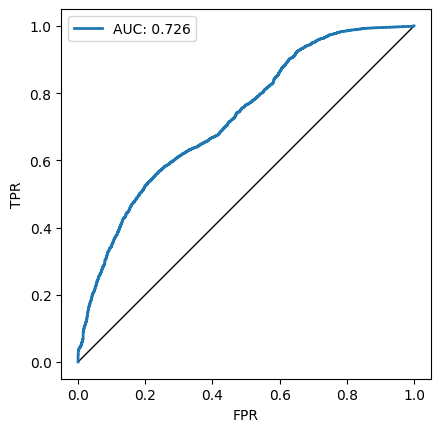

In [5]:
from services.eval_privacy import compute_mia_attacks

attacks_results, fig = compute_mia_attacks(model=loaded_model, X_train=X_train_final_res, X_test=X_test_final, y_train=y_train_final_res, y_test=y_test_final)

In [6]:
import pandas as pd

pd.set_option("display.max_rows", 8, "display.max_columns", None)
print(attacks_results.calculate_pd_dataframe())

           slice feature slice value  train size  test size  \
0         Entire dataset                  252487      76137   
1         Entire dataset                  252487      76137   
2                  class           0      201990      74280   
3                  class           0      201990      74280   
..                   ...         ...         ...        ...   
26  correctly_classified        True      201990      74280   
27  correctly_classified        True      201990      74280   
28  correctly_classified       False       50497       1857   
29  correctly_classified       False       50497       1857   

            attack type  Attacker advantage  Positive predictive value  \
0      THRESHOLD_ATTACK            0.244297                   0.768497   
1   LOGISTIC_REGRESSION            0.297346                   1.000000   
2      THRESHOLD_ATTACK            0.221590                   0.731133   
3   LOGISTIC_REGRESSION            0.234977                   0.871245   